# PROYECTO INTEGRADO


Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. 

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


**Objetivo:** 
Identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

## 1. Inicialización

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## 2. Cargar datos

In [6]:
games = pd.read_csv('games.csv')

## 3. Preparar los datos

In [8]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Al observar los datos disponibles podemos identificar que:
- Los títulos de las columnas deben estandarizarse
- El tipo de dato de la columna 'years_of_release' es incorrecto
- La columna 'user_score' tiene un tipo de dato incorrecto
- Debemos analizar poruqe tenemos valores ausentes, teniendo en cuenta que para el año 2016 sabemos que tenemos datos ausentes por falta de registro

### 3.1. Cambio a minúsculas

In [12]:

games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 3.2. Corregir tipo de datos

In [14]:

games['year_of_release']= games['year_of_release'].astype('Int64')
games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64

In [15]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
games['user_score']= games['user_score'].replace('tbd', 'nan')
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'nan', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
games['user_score']= games['user_score'].astype(float)
games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

### 3.3. Valores ausentes

In [19]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [20]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [21]:
games.dropna(subset = ['name'], inplace= True)
games['name'].isna().sum()

0

In [22]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
games.dropna(subset = ['year_of_release'], inplace= True)
games['year_of_release'].isna().sum()

0

In [24]:
100* games.isna().sum()/games.shape[0]

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

### 3.4. Cambios realizados:
- Tenemos los títulos de las columnas estandarizados
- Corregimos el tipo de datos de las columnas para su procesamiento
- Teniendo en cuenta que TBD: significa "to be determined" (a determinar), podemos considerar que son valores ausentes, ya que en el momento no tenemos un valor para ello y dejarlo como TBD dificulta el analisis de la columna en general.
- Valores ausentes:
  - Vemos que los valores ausentes de las columnas name y genre son 2 de 16715 datos, sus filas no tienen mucha relevancia, ya que sus tiene otros 3 valores nulos, asi que se proceden a eliminarlos
  - Si pasamos a la columna 'year_of_release' los datos ausentes son apenas 269, al analizar como convertir los datos para no perder las filas, nos damos cuenta uqe al tener diferentes plataformas, no se podria estandarizar un valor como la media o la mediana para reemplazar el NA, asi que se decidio eliminarlos
  - Para las últimas 3 columnas, tenemos entre el 40 - 50% de los datos ausentes. Este tipo de datos al ser score para cada juego, no podemos estandarizarlos y mucho menos eliminarlos, asi que se mantendran en el DataFrame para su analisis.


### 3.5. Ventas totales

In [27]:
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

## 4. Análisis de datos 

### 4.1. Lanzamiento por año

<Axes: xlabel='year_of_release', ylabel='cantidad de juegos'>

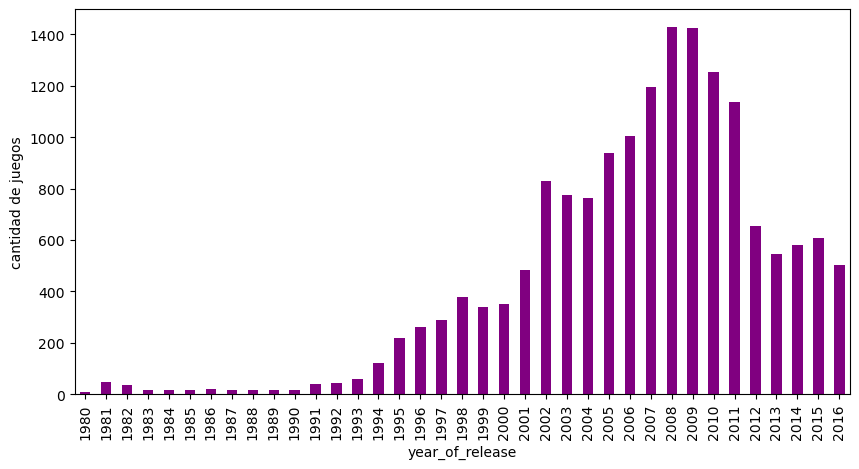

In [30]:
games.groupby('year_of_release')['name'].count().plot(kind='bar', figsize= [10,5], ylabel= 'cantidad de juegos', color= 'purple')

In [31]:
games['year_of_release'].describe()

count        16444.0
mean     2006.486256
std         5.875525
min           1980.0
25%           2003.0
50%           2007.0
75%           2010.0
max           2016.0
Name: year_of_release, dtype: Float64

**Observación:** 
Encontramos que aproximadamente los datos desde el 2001 empiezan a tener más significado ya que antes de ese año la venta de videojuegos era muy baja, lo cual podria alterar el analisis de los ultimos años que podrian ser mas relevantes e importantes para generar nuestra nueva campaña, teniendo en cuenta nuestor objetivo.

### 4.2. Observa cómo varían las ventas de una plataforma a otra. 
Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [34]:
# Ventas por plataforma
sales_per_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sales_per_platform.head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

In [35]:
# Principales plataformas
top_platforms = sales_per_platform.head(5).index
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

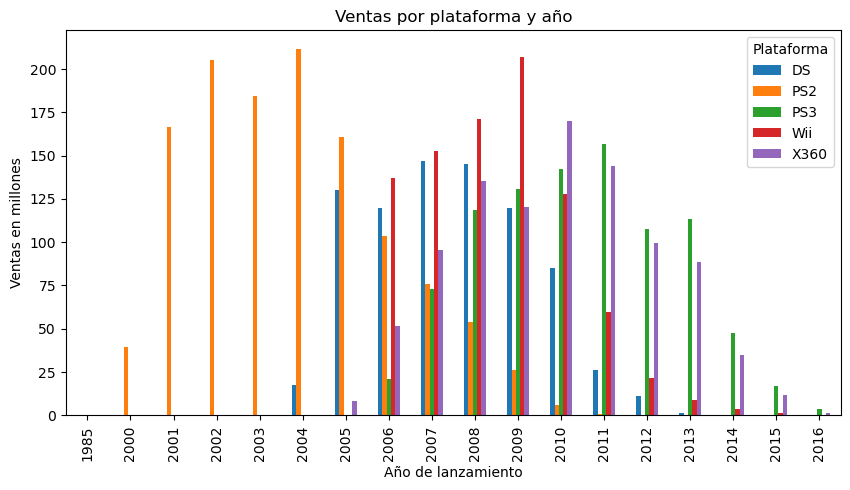

In [36]:
# Ventas por año de las principales plataformas 
games_top = games[games['platform'].isin(top_platforms)]
sales_per_year = games_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

sales_per_year.plot(kind='bar', figsize=(10, 5))
plt.title('Ventas por plataforma y año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas en millones')
plt.legend(title='Plataforma')
plt.show()

In [37]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
activity = games.groupby('platform')['year_of_release'].agg(['min', 'max'])

activity['duration'] = activity['max'] - activity['min']
activity = activity.sort_values(by='duration', ascending=False)
activity.head()

,min,max,duration
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11


In [38]:
activity['duration'].describe()

count        31.0
mean     7.612903
std      6.998464
min           0.0
25%           3.0
50%           6.0
75%          10.0
max          31.0
Name: duration, dtype: Float64

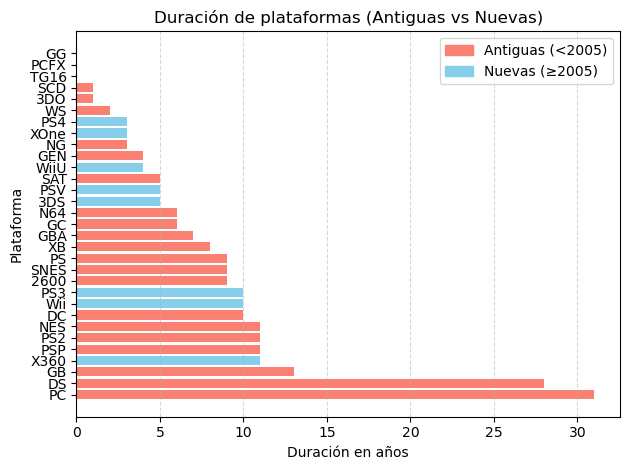

In [39]:
# Fila de duracion de cada plataforma
activity['type'] = activity['min'].apply(lambda x: 'Antigua' if x < 2005 else 'Nueva')

# Colores por tipo
colores = activity['type'].map({'Antigua': 'salmon', 'Nueva': 'skyblue'})

# Ordenamos por duración para mejor visualización

plt.barh(activity.index, activity['duration'], color = colores)

plt.xlabel('Duración en años')
plt.ylabel('Plataforma')
plt.title('Duración de plataformas (Antiguas vs Nuevas)')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Agregamos leyenda manual
import matplotlib.patches as mpatches

plt.legend(handles=[
    mpatches.Patch(color='salmon', label='Antiguas (<2005)'),
    mpatches.Patch(color='skyblue', label='Nuevas (≥2005)')
])
plt.tight_layout()
plt.show()


**Observación:**
A simple vista al dividir las ventas totales por plataforma, vemos que mantienen una distribución normal a través de los años. 
Ya en cuanto a su duracion vemos que hay plataformas que al pasar el tiempo se mantienen activas como lo son los juegos de PC y DS. Sin embargo, podemos deicr que la duracion promedio por plataforma es de 7 años y medio.


### 4.3. Determina para qué período debes tomar datos. 

Teniendo en cuenta la dispersion de los datos, encontramos que el periodo de tiempo signiticativo estarian desde el 2005 en adelante, ya que las ventas en los años anteriores fueron muy bajas. Adicionalmente si tenemos en cuenta la duracion media de las plataformas, tomar los datos de los ultimos años nos permitira generar un modelo actual.

In [43]:
games= games[games['year_of_release']>= 2005]
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11272 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11272 non-null  object 
 1   platform         11272 non-null  object 
 2   year_of_release  11272 non-null  Int64  
 3   genre            11272 non-null  object 
 4   na_sales         11272 non-null  float64
 5   eu_sales         11272 non-null  float64
 6   jp_sales         11272 non-null  float64
 7   other_sales      11272 non-null  float64
 8   critic_score     5645 non-null   float64
 9   user_score       5538 non-null   float64
 10  rating           7310 non-null   object 
 11  total_sales      11272 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.1+ MB


### 4.4. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

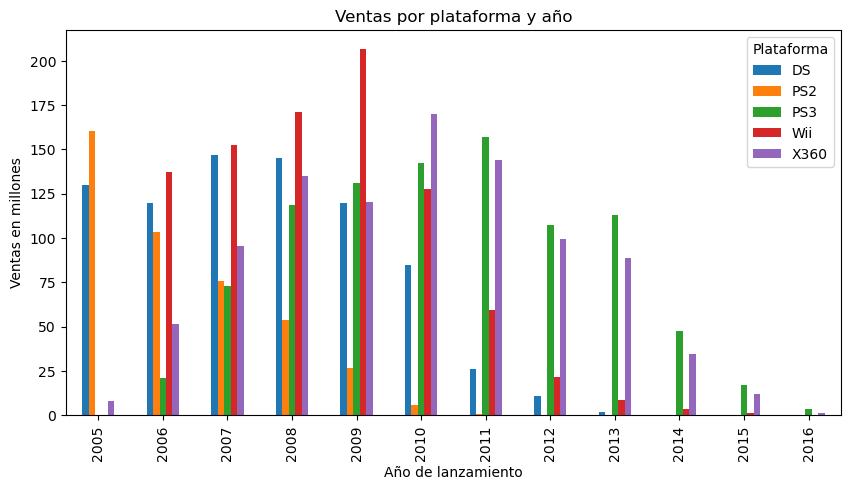

In [45]:
games_top = games[games['platform'].isin(top_platforms)]
sales_per_year = games_top.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

sales_per_year.plot(kind='bar', figsize=(10, 5))
plt.title('Ventas por plataforma y año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas en millones')
plt.legend(title='Plataforma')
plt.show()

### 4.5. Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

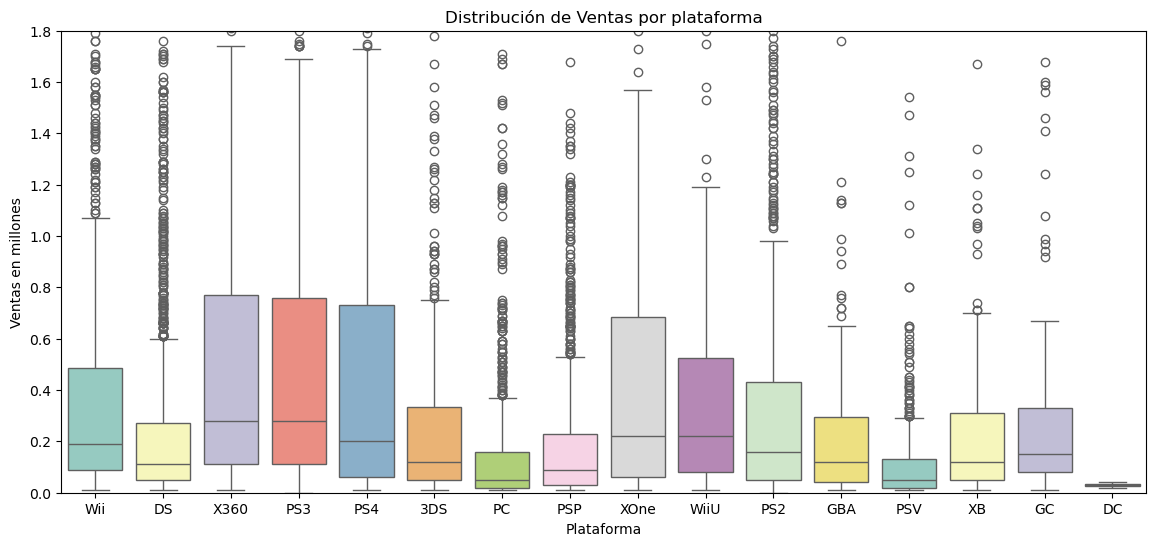

In [47]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=games, x='platform', y='total_sales', hue = 'platform', palette='Set3', legend=False)
plt.title('Distribución de Ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en millones')
plt.ylim(0, games['total_sales'].quantile(0.95))
plt.show()

Al ver la distribución de los datos podemos inferir que: 
- Las plataformas top en ventas estan relacionadas con las plataformas de mayor dispersion de datos. Es decir, estas plataformas tienen un amplio catalogo de juegos, donde algunos son exito y top en ventas y elevan las ventas generales por plataforma.
- Podemos tomar las plataformas top en ventas para generar nuestro nuevo modelo.

### 4.6. Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

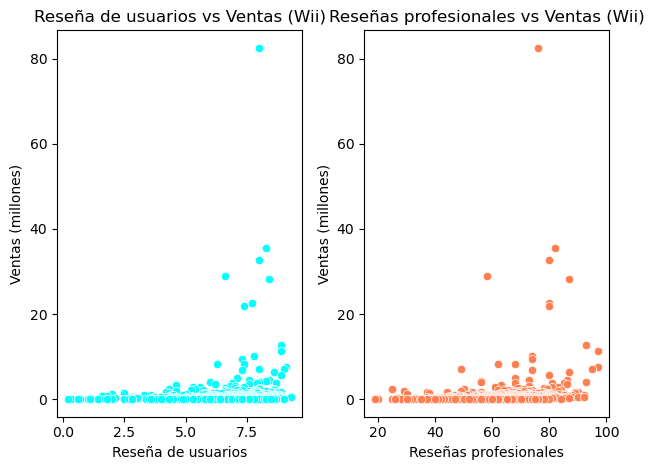

In [50]:
wii_df = games[games['platform'] == 'Wii']

# Usuarios
plt.subplot(1, 2, 1)
sns.scatterplot(data=wii_df, x='user_score', y='total_sales', color='cyan')
plt.title('Reseña de usuarios vs Ventas (Wii)')
plt.xlabel('Reseña de usuarios')
plt.ylabel('Ventas (millones)')

# Profesionales
plt.subplot(1, 2, 2)
sns.scatterplot(data=wii_df, x='critic_score', y='total_sales', color='coral')
plt.title('Reseñas profesionales vs Ventas (Wii)')
plt.xlabel('Reseñas profesionales')
plt.ylabel('Ventas (millones)')

plt.tight_layout()
plt.show()


In [51]:
# Correlaciones
user_corr = wii_df['user_score'].corr(wii_df['total_sales'])
critic_corr = wii_df['critic_score'].corr(wii_df['total_sales'])

print(f'Correlación entre User Score y Ventas: {user_corr:.2f}')
print(f'Correlación entre Critic Score y Ventas: {critic_corr:.2f}')

Correlación entre User Score y Ventas: 0.11
Correlación entre Critic Score y Ventas: 0.18


**Correlaciones:** 
- Según el coeficiente de correlación de Pearson vemos que se ambas correlaciones se acercan mucho a 0. Esto quiere decir que las ventas se mantienen igual independiente de las reseñas tanto de los usuarios como de los profesionales. Por lo tanto, son otros factores los que influyen en las ventas de los juegos.

### 4.7. Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [54]:
#Juego por plataforma
sales_by_game_platform = games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Juegos multiplataforma
game_counts = sales_by_game_platform['name'].value_counts()
multiplatform_games = game_counts[game_counts > 1].index

# Ventas de esos juegos
multiplatform_sales = sales_by_game_platform[sales_by_game_platform['name'].isin(multiplatform_games)]
multiplatform_sales.head()

,name,platform,total_sales
2,Frozen: Olaf's Quest,3DS,0.59
3,Frozen: Olaf's Quest,DS,0.51
12,007: Quantum of Solace,DS,0.13
13,007: Quantum of Solace,PC,0.02
14,007: Quantum of Solace,PS2,0.43


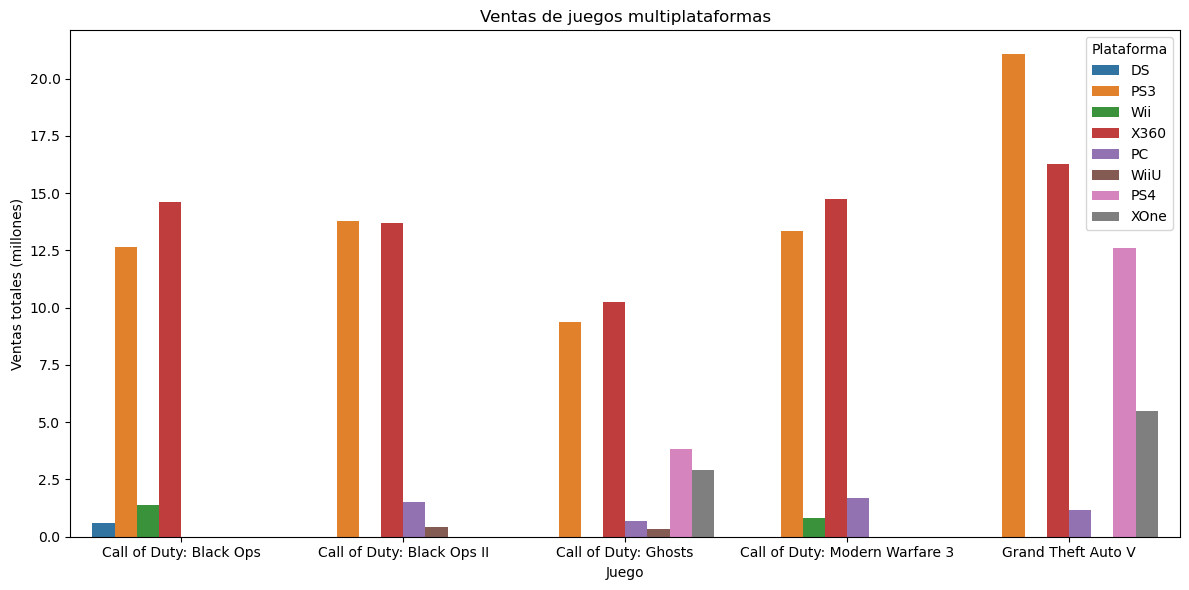

In [55]:
# Preparacion para gráfico (top juegos)
top_games = multiplatform_sales.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).index
plot_data = multiplatform_sales[multiplatform_sales['name'].isin(top_games)]

#Gráfico

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='name', y='total_sales', hue='platform')

plt.title('Ventas de juegos multiplataformas')
plt.xlabel('Juego')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()


/var/folders/yf/98d9rz7x40l65lr1x28d17vr0000gn/T/ipykernel_28240/2575084590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=games, x='platform', y='total_sales', palette='Set3')


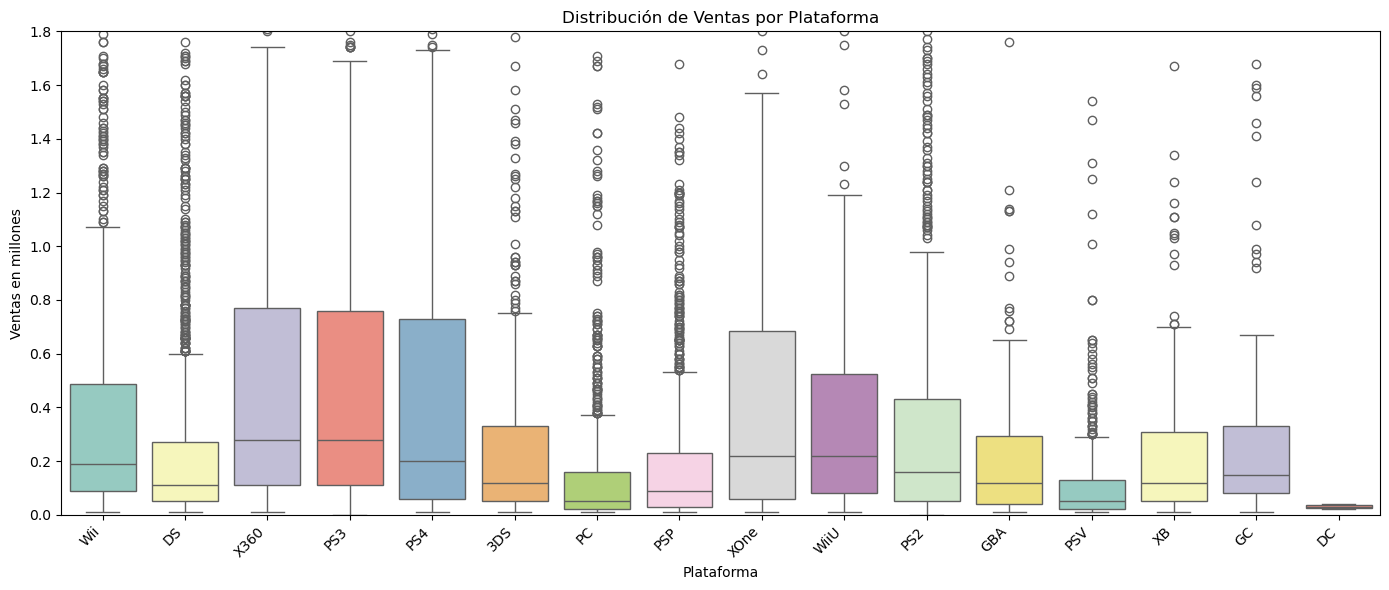

In [56]:


plt.figure(figsize=(14, 6))
sns.boxplot(data=games, x='platform', y='total_sales', palette='Set3')
plt.title('Distribución de Ventas por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en millones')
plt.ylim(0, games['total_sales'].quantile(0.95))
# Rotar etiquetas si hay muchas plataformas
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vemos que a pesar de estar el mismo juego en diferentes plataformas, son los juegos de PS3 y X360 los que lideran por mucho las ventas de los juegos multiplataforma. 

### 4.8. Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [59]:
genre_games = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_games

genre
Action          1202.04
Sports           853.34
Shooter          758.56
Misc             615.83
Role-Playing     550.78
Racing           355.03
Platform         303.06
Simulation       269.62
Fighting         208.07
Adventure        149.81
Puzzle           110.28
Strategy          78.42
Name: total_sales, dtype: float64

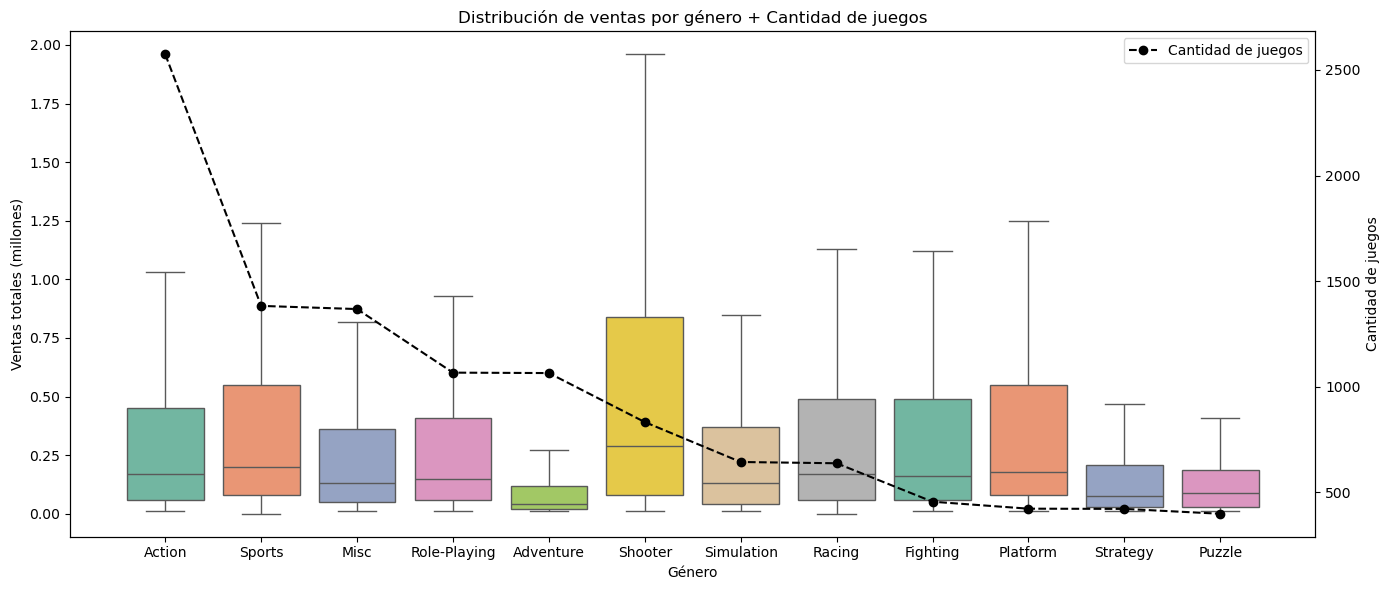

In [131]:
#Series para ordenar la cantidad de juegos vendidos por género 
genre_games = games['genre'].value_counts()

# Orden deseado (por cantidad de juegos)
ordered_genres = genre_games.index.tolist()

# Convertir la columna 'genre' en tipo categoría ordenada
games['genre'] = pd.Categorical(games['genre'], categories=ordered_genres, ordered=True)

# (Re)ordenar el DataFrame según ese orden
games = games.sort_values('genre')

#Gráfico
fig, ax1 = plt.subplots(figsize=(14, 6))
sns.boxplot(data=games, x='genre', y='total_sales', showfliers= False, hue='genre', palette = 'Set2')
ax1.set_xlabel('Género')
ax1.set_ylabel('Ventas totales (millones)')
ax1.set_title('Distribución de ventas por género + Cantidad de juegos')

ax2 = ax1.twinx()
ax2.plot(genre_games, color='black', marker='o', linestyle='--', label='Cantidad de juegos')
ax2.set_ylabel('Cantidad de juegos')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


/var/folders/yf/98d9rz7x40l65lr1x28d17vr0000gn/T/ipykernel_28240/1700788732.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(genre_sales.index, rotation=45, ha='right')


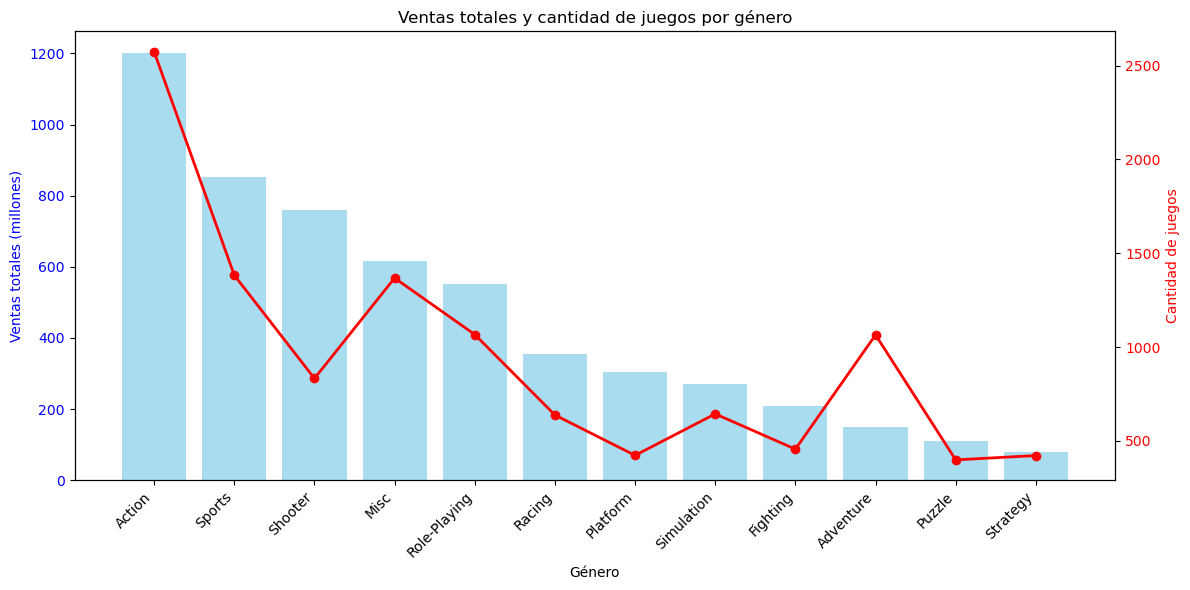

In [61]:
#Otra forma de ordenar los valores

# Calcular ventas totales por género (ordenadas)
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Calcular cantidad de juegos por género (mismo orden que ventas)
genre_count = games['genre'].value_counts().reindex(genre_sales.index)

# Crear figura con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para ventas totales
bars = ax1.bar(genre_sales.index, genre_sales.values, color='skyblue', alpha=0.7)
ax1.set_xlabel('Género')
ax1.set_ylabel('Ventas totales (millones)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(genre_sales.index, rotation=45, ha='right')

# Eje secundario para cantidad de juegos
ax2 = ax1.twinx()
ax2.plot(genre_sales.index, genre_count.values, 'ro-', linewidth=2)
ax2.set_ylabel('Cantidad de juegos', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Título y ajustes
plt.title('Ventas totales y cantidad de juegos por género')
plt.tight_layout()
plt.show()

Observando la distribución de ventas por genero, vemos que no podemos generalizar acerca de los géneros con ventas altas y bajas ya que para cada género es diferente su relación en cuanto a cantidad de juegos vs. ventas.

## 5. Perfil de usuario por región

### 5.1. Plataformas principales 

In [65]:
total_na = games['na_sales'].sum()
total_eu = games['eu_sales'].sum()
total_jp = games['jp_sales'].sum()

share_na = (games.groupby('platform')['na_sales'].sum() / total_na * 100).sort_values(ascending=False).head(5)
share_eu = (games.groupby('platform')['eu_sales'].sum() / total_eu * 100).sort_values(ascending=False).head(5)
share_jp = (games.groupby('platform')['jp_sales'].sum() / total_jp * 100).sort_values(ascending=False).head(5)



print("Cuota de mercado en NA (Top 5 plataformas):\n", share_na)
print("\nCuota de mercado en EU (Top 5 plataformas):\n", share_eu)
print("\nCuota de mercado en JP (Top 5 plataformas):\n", share_jp)

Cuota de mercado en NA (Top 5 plataformas):
 platform
X360    22.661879
Wii     18.520477
PS3     14.840499
DS      14.150075
PS2      7.626616
Name: na_sales, dtype: float64

Cuota de mercado en EU (Top 5 plataformas):
 platform
PS3     20.234245
X360    16.592563
Wii     15.974176
DS      11.408006
PS4      8.724824
Name: eu_sales, dtype: float64

Cuota de mercado en JP (Top 5 plataformas):
 platform
DS     27.835537
3DS    16.345560
PS3    12.900029
PSP    11.996816
Wii    11.091978
Name: jp_sales, dtype: float64


In [66]:
df_share =pd.concat([share_na, share_eu, share_jp], axis='columns')
df_share

,na_sales,eu_sales,jp_sales
platform,,,
X360,22.661879,16.592563,NaN
Wii,18.520477,15.974176,11.091978
PS3,14.840499,20.234245,12.900029
DS,14.150075,11.408006,27.835537
PS2,7.626616,NaN,NaN
PS4,NaN,8.724824,NaN
3DS,NaN,NaN,16.345560
PSP,NaN,NaN,11.996816


Al comparar las regiones vemos que las ventas en NA y en EU en cuanto al top en ventas por plataforma, son similiares. Por un lado, notamos que las plataformas Wii, PS3 y DS estan dentro del top de ventas para las 3 regiones. Por otro lado, plataformas como 3DS, PSP, PS4 y PS2 se venden en regiones especificas, lo cual podriamos tener en cuenta a la hora de generar marketing.

### 5.2. Géneros por región

In [69]:
top_genre_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genre_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genre_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Generos más vendidos en NA (Top 5):\n", top_genre_na)
print("\nGeneros más vendidos en EU (Top 5 :\n", top_genre_eu)
print("\nGeneros más vendidos en JP (Top 5):\n", top_genre_jp)

Generos más vendidos en NA (Top 5):
 genre
Action          580.04
Sports          432.70
Shooter         400.96
Misc            311.82
Role-Playing    211.85
Name: na_sales, dtype: float64

Generos más vendidos en EU (Top 5 :
 genre
Action     372.58
Sports     265.61
Shooter    248.07
Misc       167.09
Racing     129.05
Name: eu_sales, dtype: float64

Generos más vendidos en JP (Top 5):
 genre
Role-Playing    179.60
Action          108.39
Misc             72.49
Sports           52.51
Platform         36.32
Name: jp_sales, dtype: float64


In [70]:
df_top_genre =pd.concat([top_genre_na, top_genre_eu, top_genre_jp], axis='columns')
df_top_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,580.04,372.58,108.39
Sports,432.70,265.61,52.51
Shooter,400.96,248.07,NaN
Misc,311.82,167.09,72.49
Role-Playing,211.85,NaN,179.60
Racing,NaN,129.05,NaN
Platform,NaN,NaN,36.32


Observmaos que al tomar solo los generos más vendidos por región, se venden aproximadamente los mismos generos en todas las regiones, sin embargo, mientras que los generos Action, Sports y Misc, se venden en todas las regiones, generos como Racing y Platform solo se venden en regiones especificas (EU y JP respectivamente) y sus ventas son bajas. 
Por otro lado vemos que el genero Shooter no se vende en JP pero tiene ventas significativas.

### 5.3. Clasificaciones de ESRB

In [73]:
esrb_na = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

df_rating_region =pd.concat([esrb_na, esrb_eu, esrb_jp], axis='columns')
df_rating_region

,na_sales,eu_sales,jp_sales
rating,,,
E,873.10,508.71,147.33
M,607.34,414.11,46.23
T,479.08,258.17,91.32
E10+,343.02,181.92,39.05
EC,1.53,0.11,0.00
AO,1.26,0.61,0.00
RP,0.00,0.03,0.00


Aca verificamos que si tiene que ver la clasificación ESRB a la hora de las ventas. Los que tienen clasificacion E y M se encuentran en el top de ventas en las 3 regiones con un porcentaje significativo de diferencia. Seguidos por los juegos con clasificación T y E10+ que tambien se venden en todas las regiones pero en menor cantidad.

## 6. Prueba de hipotesis

### 6.1.Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

In [77]:
xone_info = games[games['platform']=='XOne']['user_score'].dropna()
pc_info = games[games['platform']=='PC']['user_score'].dropna()

alpha= 0.05
results=st.ttest_ind(xone_info, pc_info)
print('pvalue:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

pvalue: 0.0036925827463950033
Rechazamos la hipótesis nula


H0 = Las clasificaciones son las mismas
HA= Las clasificaciones promedio son diferentes 
Al rechazar la H0 podemos decir que las clasificaciones promedio de los usuarios para las plataformas XOne y PC son diferentes.

### 6.2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [80]:
action_info = games[games['genre']=='Action']['user_score'].dropna()
sport_info = games[games['genre']=='Sports']['user_score'].dropna()

alpha= 0.05
results=st.ttest_ind(action_info, sport_info)
print('pvalue:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

pvalue: 6.299384839540833e-10
Rechazamos la hipótesis nula


H0 = Las clasificaciones son las mismas
HA= Las clasificaciones promedio son diferentes 
Al rechazar la H0 podemos decir que las clasificaciones promedio de los usuarios para los generos Action y Sports si son diferentes.

## Conclusión general

Luego de ajustar los datos y conocer las ventas totales por cada juego para su análisis, encontramos que:

1. **Duración en el mercado de las plataformas:** El periodo de tiempo en los datos era muy extenso y no aportaba informacion significativa para una futura campaña publicitaria, por lo tanto se tomaron los datos desde el 2005.

2. **Plataformas:** Identificamos que existen plataformas lideres en el mercado. Plataformas como DS y PC han generado ventas estables año tras año. 

3. **Ventas:** Las plataformas top en ventas estan relacionadas con las plataformas de mayor dispersion de datos. Es decir, estas plataformas tienen un amplio catalogo de juegos, donde algunos son exito y top en ventas y elevan las ventas generales por plataforma.

4. **Reseñas:** Al compararlas vemos que las ventas se mantienen igual independiente de las reseñas tanto de los usuarios como de los profesionales.

5. **Multiplataforma:** Vemos que a pesar de estar el mismo juego en diferentes plataformas, son los juegos de PS3 y X360 los que lideran por mucho las ventas de los juegos multiplataforma.

6. **Género:** Observando la distribución de ventas por genero, vemos que no podemos generalizar acerca de los géneros con ventas altas y bajas ya que para cada género es diferente su relación en cuanto a cantidad de juegos vs. ventas.

7. **Análisis por región:** Al comparar las regiones vemos que las ventas en NA y en EU en cuanto al top en ventas por plataforma, son similiares. Por un lado, notamos que las plataformas Wii, PS3 y DS estan dentro del top de ventas para las 3 regiones. Por otro lado, plataformas como 3DS, PSP, PS4 y PS2 se venden en regiones especificas. 
Ya en cuanto a los géneros mas vendidos, vemos que los generos Action, Sports y Misc, se venden en todas las regiones, generos como Racing y Platform solo se venden en regiones especificas (EU y JP respectivamente) y sus ventas son bajas. Por otro lado vemos que el genero Shooter no se vende en JP pero tiene ventas significativas.

8. **Clasificación ESRB:** Los que tienen clasificacion E y M se encuentran en el top de ventas en las 3 regiones con un porcentaje significativo de diferencia. Seguidos por los juegos con clasificación T y E10+ que tambien se venden en todas las regiones pero en menor cantidad.

En general, se podria sugerir para la nueva campaña publicitaria tener en cuenta: A que región va dirigida, en que plataforma se quiere ofrecer y en que genero y ESRB estaria clasificado, para asi mismo invertir en publicidad y marketing a los verdaderos clientes potenciales. 